In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

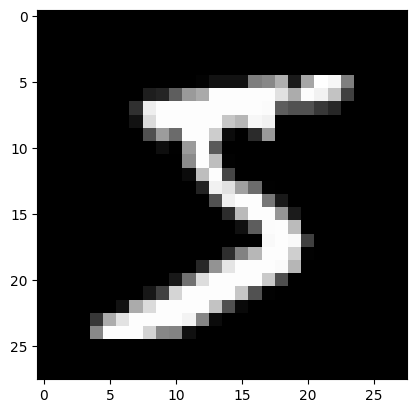

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

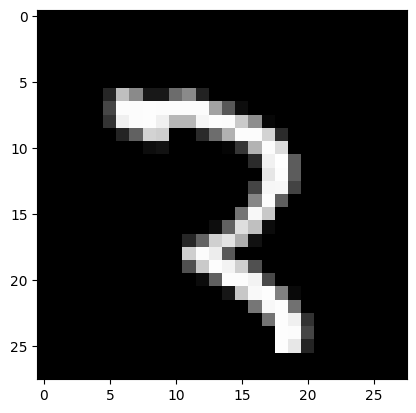

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 64)                3

In [23]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=128, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
469/469 [==============================] - 14s 28ms/step - loss: 0.2819 - accuracy: 0.9175 - val_loss: 0.0776 - val_accuracy: 0.9746
Epoch 2/5
469/469 [==============================] - 13s 28ms/step - loss: 0.0739 - accuracy: 0.9765 - val_loss: 0.0587 - val_accuracy: 0.9816
Epoch 3/5
469/469 [==============================] - 12s 27ms/step - loss: 0.0528 - accuracy: 0.9835 - val_loss: 0.0450 - val_accuracy: 0.9871
Epoch 4/5
469/469 [==============================] - 13s 27ms/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.0421 - val_accuracy: 0.9861
Epoch 5/5
469/469 [==============================] - 14s 29ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.0351 - val_accuracy: 0.9880


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.281857,0.917517,0.077622,0.9746
1,0.073924,0.976550,0.058669,0.9816
2,0.052774,0.983533,0.044973,0.9871
3,0.042136,0.986783,0.042103,0.9861
4,0.034551,0.989067,0.035118,0.9880


<Axes: >

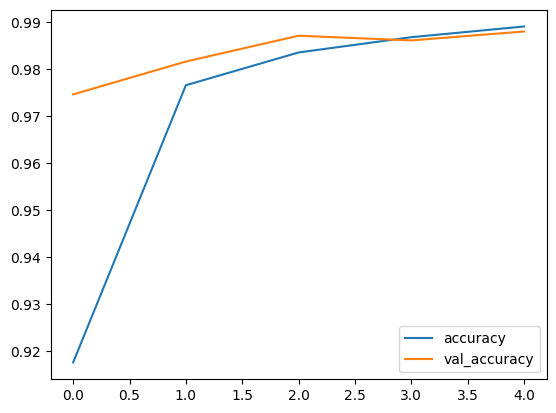

In [27]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

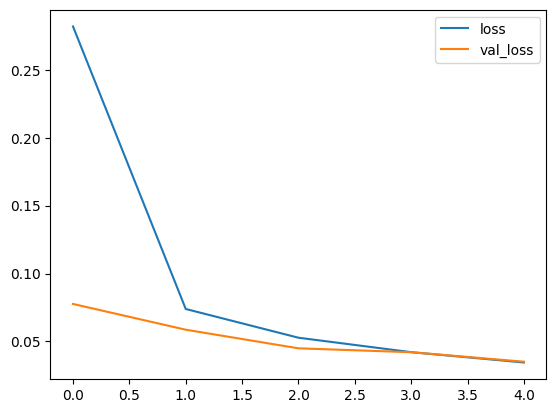

In [28]:
metrics[['loss','val_loss']].plot()

In [29]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 5ms/step


In [30]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 968    0    0    0    0    0    8    2    2    0]
 [   0 1132    2    0    0    1    0    0    0    0]
 [   2    1 1023    0    0    0    2    4    0    0]
 [   0    0    3  998    0    7    0    1    1    0]
 [   0    0    0    0  974    0    5    0    0    3]
 [   1    0    0    3    0  886    1    1    0    0]
 [   1    2    0    0    1    3  951    0    0    0]
 [   0    2    5    3    0    0    0 1018    0    0]
 [   3    0    8    0    2    7    7    3  940    4]
 [   2    2    1    0    7    3    2    2    0  990]]


In [31]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.97      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Prediction for a single input**



In [32]:
img = image.load_img('data.png')

In [33]:
type(img)

PIL.Image.Image

In [34]:
img = image.load_img('data.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [35]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 27ms/step


In [36]:
print(x_single_prediction)

[8]


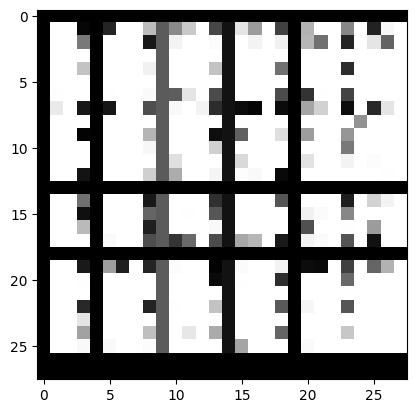

In [37]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')